# クラスタリング　ワインの分類

## サンプルデータ準備

In [6]:
import pandas as pd
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=20, centers=15, cluster_std=2.0, shuffle=True, random_state=0)
variables = ['辛さ','重厚','スパイシー','果実味','コク','酸味','落ち着き','香り','華やか','ジューシー','熟成','透明感','シャープ','力強い','フレッシュ','渋み','苦味','樽','エキゾチック','粘性']
name = list(map(str,[i for i in range(100)]))
df = pd.DataFrame(X, columns=variables, index=name)

In [7]:
df.head(10)

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
0,-6.867455,-5.634108,-0.881840,-6.482588,-7.159777,-6.394668,2.528458,-9.883541,7.197917,-7.291906,7.651226,1.407066,12.381189,2.889084,3.602466,-6.967406,-2.833069,-5.861254,-5.390123,-13.294555
1,8.591997,-2.939312,-2.795689,8.441495,8.202073,5.035962,-9.551829,11.863202,1.391670,6.811569,-5.089919,7.814202,-7.849138,0.114050,-2.882001,7.194346,7.214782,2.017785,-0.986718,-7.536471
2,0.246883,4.617195,3.212311,1.596973,-3.055192,0.042299,1.480808,6.456562,7.968668,-3.373548,2.148362,-0.378050,0.401580,9.752649,-7.182365,-8.249872,-7.731935,7.332327,5.531771,7.722099
3,5.007082,2.136003,11.041768,2.046806,-2.076545,4.375675,-9.963064,-4.988563,5.988508,-2.123277,2.397892,-2.612181,-11.314279,-2.854946,-0.393441,-2.108009,4.656146,4.359952,0.764049,-3.800434
4,-4.010045,4.244966,6.905713,-5.643761,6.686582,0.799046,-0.418340,2.750262,0.286303,-1.123998,-2.514172,-6.296712,-8.434826,8.658997,4.817495,-0.434714,-4.773589,-6.092134,-10.631048,-0.215011
5,11.458459,0.503817,-1.909037,6.150392,-8.568203,-0.035392,-5.395007,9.447122,-1.505243,-1.077127,-3.065716,5.495259,0.724136,1.525199,-10.414662,0.033869,2.070053,2.727266,10.626627,3.406191
6,-0.653447,-6.377730,6.315381,-10.059298,3.663191,3.605400,-3.907413,-7.956664,-5.047485,-0.130093,-3.324412,-1.187301,7.071626,-9.482251,-1.799952,-6.863000,3.452306,-8.497294,-2.131874,-4.718373
7,-6.133775,-5.448214,-13.063670,10.050953,-0.316636,6.468255,-6.139207,3.484811,-8.547990,0.207965,7.513344,6.220965,-2.822386,10.398543,0.492225,9.432093,10.779629,2.870184,-0.050825,6.774770
8,4.909424,-2.865518,6.103814,8.303592,7.671129,12.401938,-8.685472,1.780495,7.800347,-6.945076,-0.403811,-9.720159,-9.660127,-11.021234,6.367486,-2.469591,-4.638510,10.325739,1.583101,-10.535861
9,8.385367,-8.989615,0.226857,-8.780719,5.776530,-2.575645,-0.153321,-9.617810,-6.551712,-1.655644,-2.919304,7.825179,7.214884,6.061562,8.968819,-9.563794,1.976429,5.119185,7.574356,-3.812371


## エルボー法でのクラスタ数検討

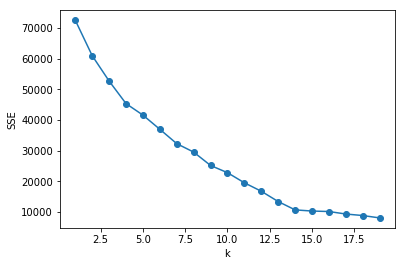

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
SSE = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_)

plt.plot(range(1, 20), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

## シルエット法でのクラスタ数検討

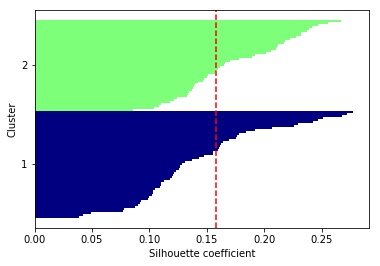

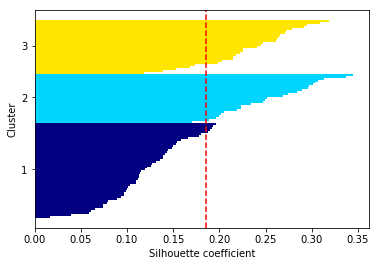

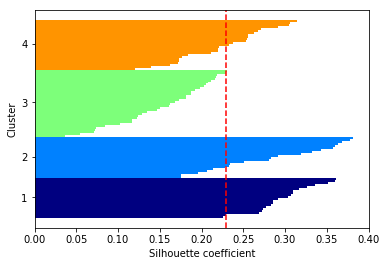

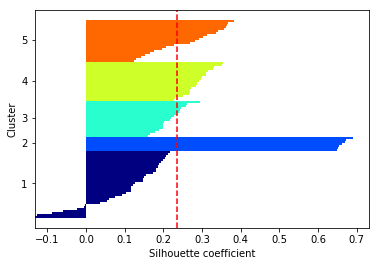

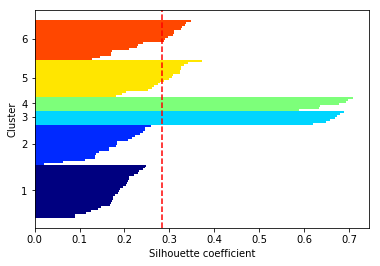

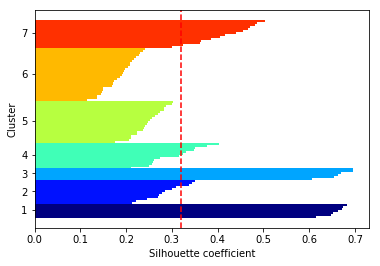

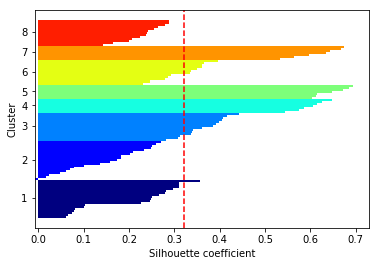

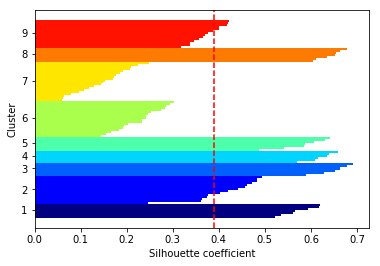

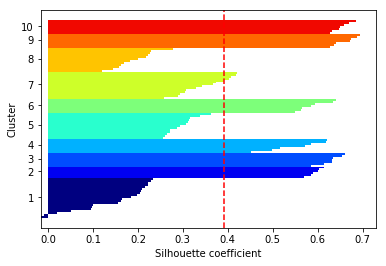

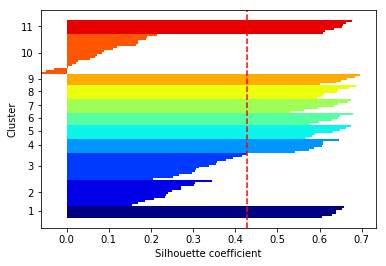

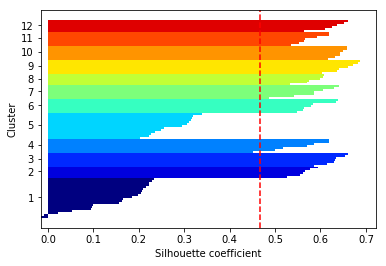

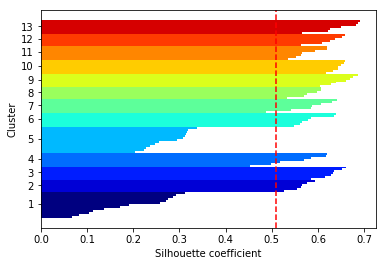

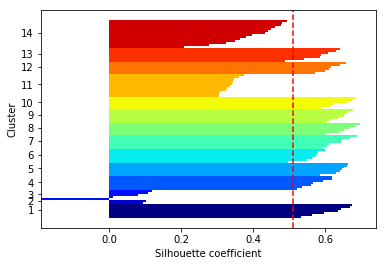

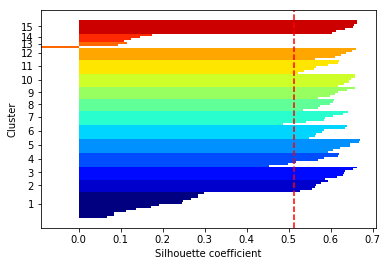

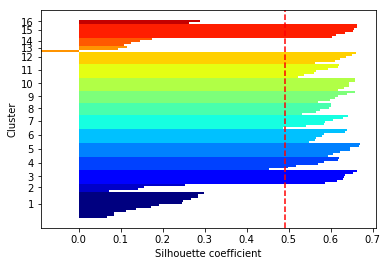

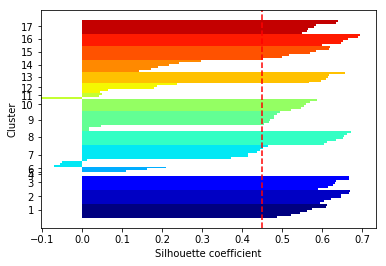

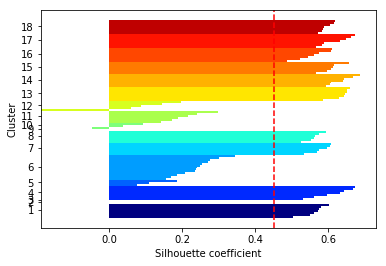

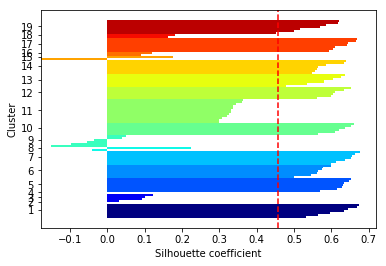

In [9]:
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm
for j in range(2, 20):
    km = KMeans(n_clusters=j, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

## 樹形図でのクラスタ数検討

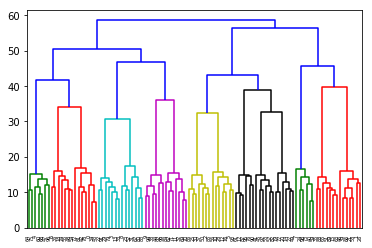

In [10]:
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=name, index=name)
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_dender = dendrogram(row_clusters, labels=name)
plt.show()

## 以上よりクラス多数15がよいかな？

## 中心点（セントロイド）の値

In [11]:
km = KMeans(n_clusters=15, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km.fit(X)
y_km = km.fit_predict(X)
print(km.cluster_centers_)

[[  2.55468263  -0.64822936  -5.37287074   7.00903327  -2.76601834
    3.64563534  -5.25737523   5.81485974  -2.40107744  -0.6049237
    2.49117362   5.98309306  -1.45596751   6.04222615  -8.04872961
    5.18741764   4.60455827   3.38531408   5.92055022   4.85063784]
 [ -3.9851595    3.64662093  -2.81515219  -5.93571671 -10.06860734
   -7.58927701   3.77698347   0.32507965   0.27279181   8.38638261
    9.43331675  -6.16555551   4.5262151   -4.33961085 -10.51870869
    4.96822824  -3.06374514  -3.54938475   1.95098158   7.6358393 ]
 [ -6.12383897   3.83093929   2.41043815  -5.72034766   7.43954562
    3.3269006   -0.93902564   1.43531692   4.79055649  -2.85489462
   -2.75567433  -4.74798336  -6.66552029   8.69498272   5.99214778
   -0.64775002  -5.84287191  -5.32431517  -9.98179972  -0.05796442]
 [  3.39896523  -0.1459408    5.54973557   8.04399571  10.05044686
    6.77015426  -9.76546514  -1.35971564   4.62666831  -7.21385063
    0.09161537 -10.45948788  -7.35622676 -10.2074943    6.62

## 決定木分析

In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y_km)
predicted = clf.predict(X)
tree.export_graphviz(clf, out_file="tree.dot",
                         feature_names=variables,
                         class_names=name,
                         filled=True, rounded=True)